In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression as lr

In [2]:
df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


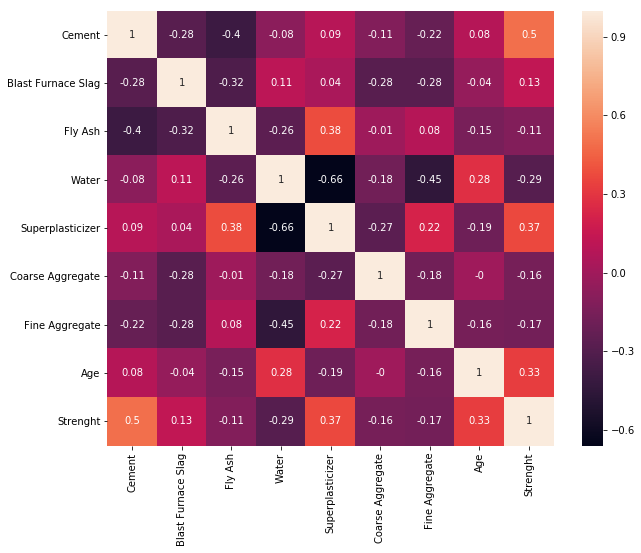

In [4]:
df.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water',
                  'Superplasticizer','Coarse Aggregate','Fine Aggregate',
                  'Age','Strenght']
corr_matr = df.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=corr_matr, annot=True)

In [5]:
X=df[['Cement','Blast Furnace Slag','Fly Ash','Water',
                  'Superplasticizer','Coarse Aggregate','Fine Aggregate',
                  'Age',]]
y=df['Strenght']

In [6]:
malli=lr()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
malli.intercept_

-23.163755811078587

In [8]:
malli.coef_

array([ 0.11978526,  0.10384725,  0.08794308, -0.1502979 ,  0.29068694,
        0.01803018,  0.02015446,  0.11422562])

In [9]:
malli.score(X,y)

0.6154647342687214

Text(0, 0.5, 'Poikkeama todellisesta')

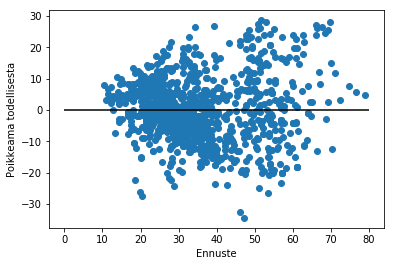

In [10]:
plt.scatter(malli.predict(X), malli.predict(X)-y)
plt.hlines(y=0,xmin=0,xmax=80)
plt.xlabel('Ennuste')
plt.ylabel('Poikkeama todellisesta')